In [77]:
library(readr)
library(plyr)
library(ggplot2)

In [2]:
duracao <- read_csv("/home/ricardo/tcc_scripts_notebook/datasets/datasets_for_R_introduction/duracao.csv")

Parsed with column specification:
cols(
  user_id = col_double(),
  course_id = col_double(),
  timeToFinish = col_double()
)


In [3]:
duracao <- rename( duracao, replace = c("user_id"="aluno", "course_id"="curso", "timeToFinish"="dias") )

In [4]:
head(duracao)

aluno,curso,dias
477,19,0
110,251,0
474,149,0
474,140,0
474,167,0
30,213,0


In [11]:
#para calcular a media e ignorar os valores na 
mean( duracao$dias, na.rm = T)

[1] 47.83649

In [12]:
#para calcular a mediana e ignorar os valores na
median( duracao$dias, na.rm = T )

[1] 8

In [14]:
#para ver detalhes sobre os dados do df
summary(duracao)

     aluno           curso            dias       
 Min.   :  1.0   Min.   :  2.0   Min.   :  0.00  
 1st Qu.:135.0   1st Qu.: 58.0   1st Qu.:  2.00  
 Median :291.0   Median : 96.0   Median :  8.00  
 Mean   :271.3   Mean   :112.9   Mean   : 47.84  
 3rd Qu.:402.0   3rd Qu.:170.0   3rd Qu.: 45.00  
 Max.   :500.0   Max.   :276.0   Max.   :538.00  
                                 NA's   :3828    

In [16]:
#para ver as dimensoes do df
dim(duracao)
dim(duracao)[1]

[1] 6366    3

[1] 6366

In [41]:
#proporcao de dias faltantes
summary(duracao$dias)["NA's"]/dim(duracao$dias)[1]
#ou
3828/6366

numeric(0)

[1] 0.6013195

In [50]:
#qtd de curso, aluno e dias
length(unique(duracao$curso))
length(unique(duracao$aluno))
length(unique(duracao$dias))

[1] 264

[1] 484

[1] 310

In [54]:
#separa os dados em subsets e calcula alguma descricao estatistica para cada separacao
sumario_estatistico <- aggregate(duracao$dias, list(duracao$curso), mean, na.rm = T)
sumario_estatistico

Group.1,x
2,126.50000
3,NaN
4,5.50000
5,33.94118
6,30.50000
7,127.25000
8,18.75000
9,151.00000
10,32.50000
11,0.00000


In [55]:
sumario_estatistico <- rename(sumario_estatistico, replace = c("Group.1"="curso", "x"="dias"))
sumario_estatistico

curso,dias
2,126.50000
3,NaN
4,5.50000
5,33.94118
6,30.50000
7,127.25000
8,18.75000
9,151.00000
10,32.50000
11,0.00000


In [58]:
popularidade <- count(duracao$curso)
popularidade <- rename(popularidade, replace = c("x"="curso", "freq"="popularidade"))
popularidade

curso,popularidade
2,15
3,1
4,20
5,42
6,54
7,93
8,41
9,11
10,6
11,2


In [59]:
popularidade_e_duracao = merge(sumario_estatistico, popularidade, by = "curso")
popularidade_e_duracao

curso,dias,popularidade
2,126.50000,15
3,NaN,1
4,5.50000,20
5,33.94118,42
6,30.50000,54
7,127.25000,93
8,18.75000,41
9,151.00000,11
10,32.50000,6
11,0.00000,2


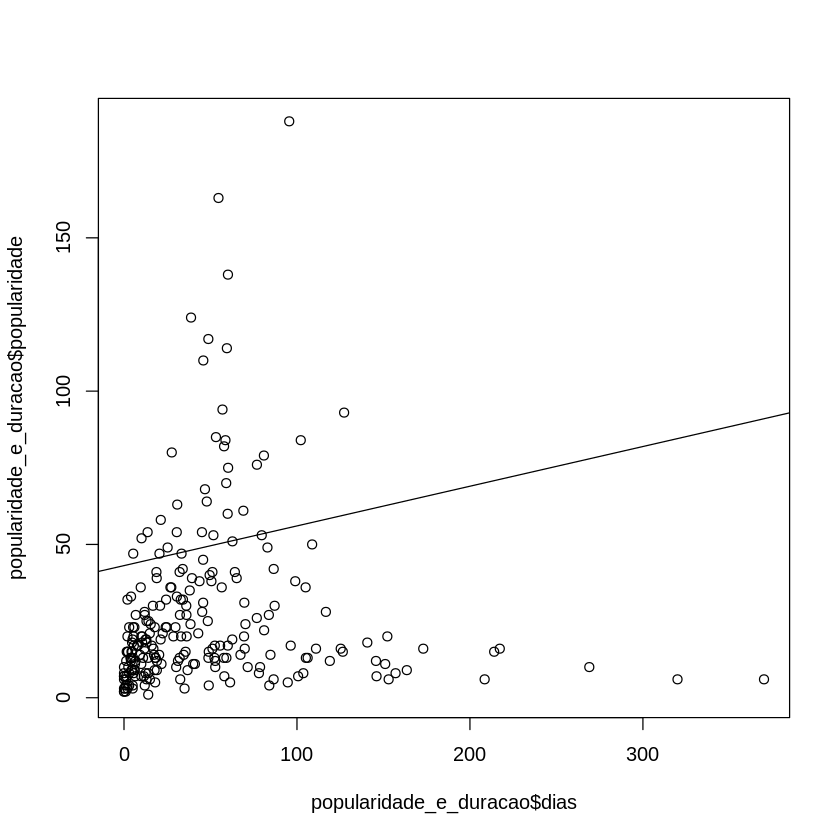

In [61]:
#primeiro passo para analisar a correlacao
plot(popularidade_e_duracao$dias, popularidade_e_duracao$popularidade)
#criacao de uma regressao linear
model.linear <- lm(popularidade_e_duracao$dias~popularidade_e_duracao$popularidade)
#adicionar a regressao linear no grafico
abline(model.linear)

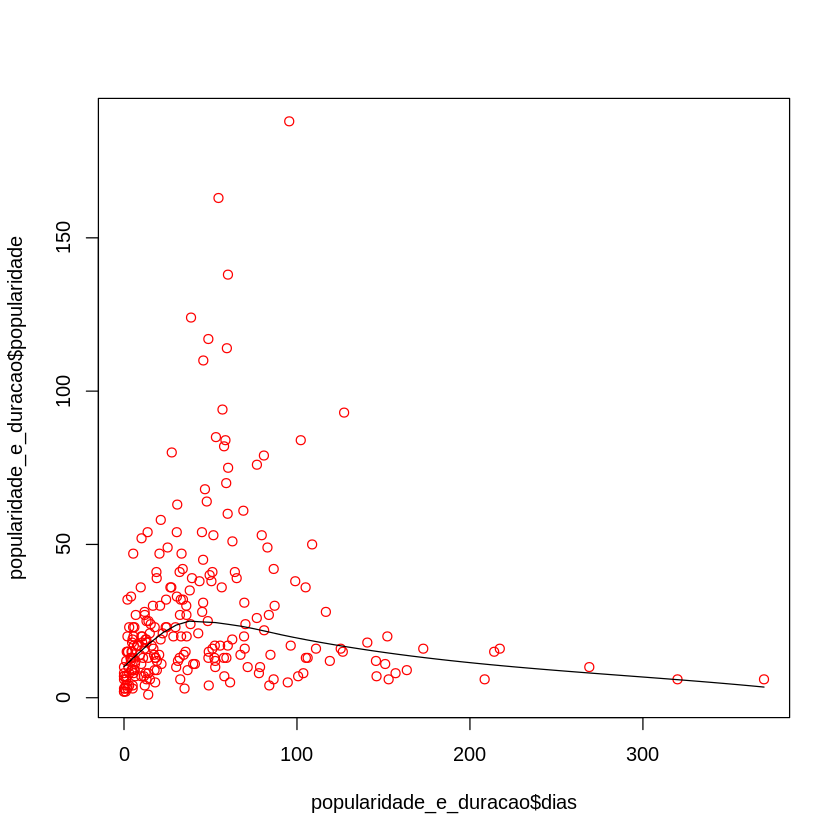

In [68]:
#como os dados nao seguem uma abordagem linear, testemos outra abordagem

scatter.smooth(popularidade_e_duracao$dias, popularidade_e_duracao$popularidade, pch = 21, col = "RED")


In [65]:
#para ver a documentacao de uma funcao
help("pch")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
“Removed 30 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 30 rows containing missing values (geom_point).”

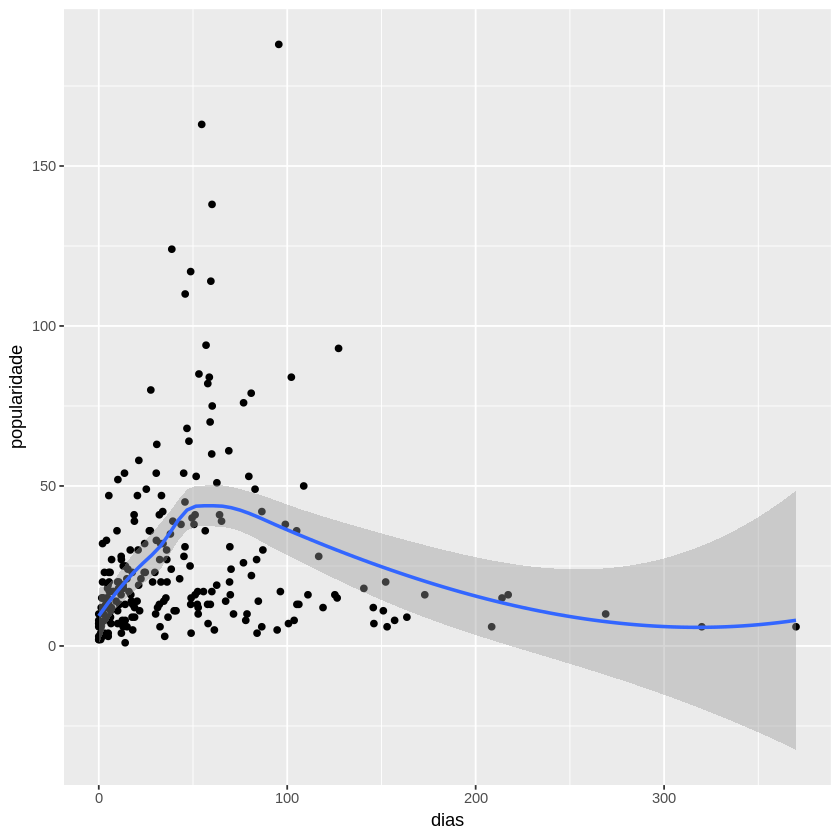

In [82]:
#para um grafio mais elegante usemos a biblioteca ggplot2
grafico <- ggplot(popularidade_e_duracao, aes(dias, popularidade))
grafico <- grafico + geom_point() + geom_smooth()
grafico